# Probabilities for three level nests differ

Asim scales nested utilties differently, for two level and RU2 it's identical to what we do (which agrees with the
larch paper and Zenith), but for three levels there are small differences of probabilities and logsums. I
quadruple-checked the scaling and leaf and note utility calculation, let's use larch to see if we get the same as
Asim or if the results agree with my implementation. The idea is to use estimation mode to load a small data set, and
 then use my Asim setup in validate_frozen_impl.ipynb to calculate Asim's and my probabilities by sampling, and check
  what larch has to say by using m.probabilities() (no need to estimate, use parameters as given by asim model).


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys

import numpy as np
import pandas as pd

# I installed larch deps (which I collected in a requirements file, xmle and sharrow are not on pypi)
# python -m pip install -r ../larch/requirements.txt

larch_path = "/mnt/c/Users/jan.zill/code/larch"
if larch_path not in sys.path:
    sys.path.append(larch_path)
import larch

In [4]:
root_dir = "/mnt/c/Users/jan.zill/code/activitysim"
example_dir = os.path.join(root_dir, "test_estimation_sf")
os.chdir(example_dir)

In [5]:
# create estimation test example
#!activitysim create -e example_estimation_sf -d test_estimation_sf

In [6]:
# run estimation mode
#!activitysim run -c configs_estimation/configs -c configs -o output_sf -d data_sf

In [7]:
modelname = "trip_mode_choice"

from activitysim.estimation.larch import component_model
model, data = component_model(modelname, return_data=True)
# data.coefficients
# data.spec
# data.chooser_data
model.load_data()
model.doctor(repair_ch_av='-')
model.loglike()
# DO NOT ESTIMATE just apply probs
# model.maximize_loglike(method='SLSQP', options={"maxiter": 1000})
probs = [m.probability() for m in model._k_models]

/mnt/c/Users/jan.zill/code/activitysim/activitysim/estimation/larch/simple_simulate.py:92: DtypeWarning: Columns (411) have mixed types.Specify dtype option on import or set low_memory=False.
  chooser_data = _read_csv(chooser_data_file, index_col=values_index_col,)
req_data does not request avail_ca or avail_co but it is set and being provided
req_data does not request avail_ca or avail_co but it is set and being provided
req_data does not request avail_ca or avail_co but it is set and being provided
req_data does not request avail_ca or avail_co but it is set and being provided
req_data does not request avail_ca or avail_co but it is set and being provided
req_data does not request avail_ca or avail_co but it is set and being provided
req_data does not request avail_ca or avail_co but it is set and being provided
req_data does not request avail_ca or avail_co but it is set and being provided
req_data does not request avail_ca or avail_co but it is set and being provided
problem: chos

In [8]:
probs_0 = pd.DataFrame(probs[0])
m_0 = model._k_models[0]

probs_0.index = m_0.dataframes.data_ch.index

probs_0 = probs_0.rename(columns={v-1: k for k,v in data.settings["CONSTANTS"]["I_MODE_MAP"].items()})

In [9]:
display(m_0.dataframes.data_ch.index.unique().shape)
display(np.intersect1d(data.chooser_data.index.values, m_0.dataframes.data_ch.index.values).shape)

(2124,)

(2124,)

In [11]:
!pwd

/mnt/c/Users/jan.zill/code/activitysim/test_estimation_sf


In [14]:
#m_0.graph.to_png(filename="/mnt/c/Users/jan.zill/code/activitysim/test_estimation_sf/mtc_test.png")

In [15]:
display(temp)

NameError: name 'temp' is not defined

In [17]:
subg = m_0.graph.subgraph_from(22)

<xmle.Elem 'img' with 0 children>
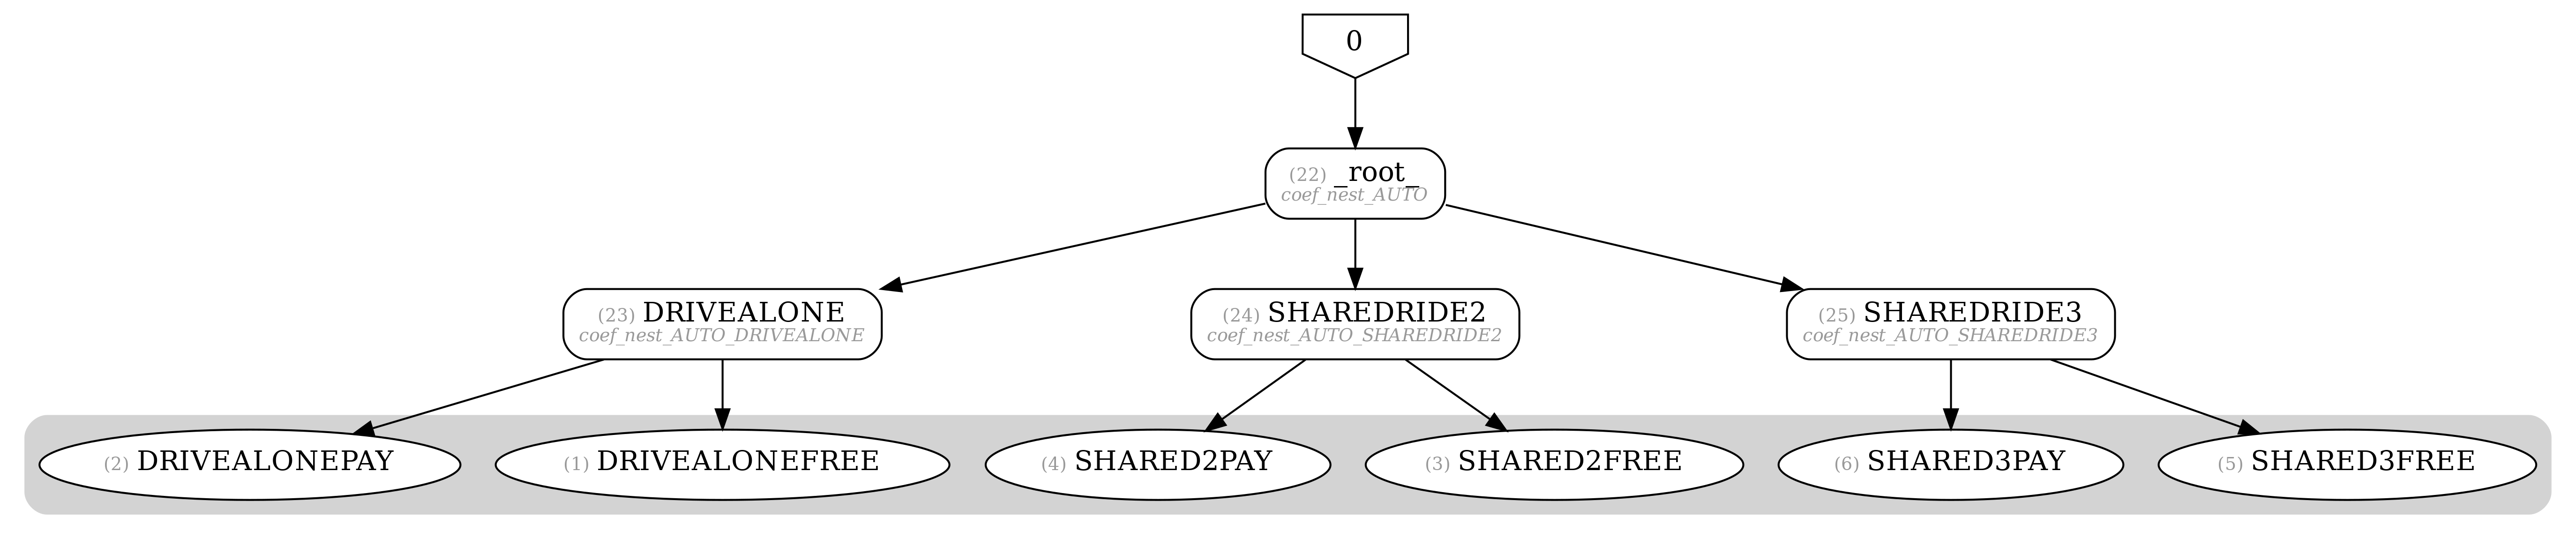

In [23]:
subg.to_png(filename="/mnt/c/Users/jan.zill/code/activitysim/test_estimation_sf/mtc_mode_choice_subgraph.png")

In [22]:
m_0.graph.partial_figure(source=22)

<xmle.Elem 'div' with 1 children>

In [18]:
#data.chooser_data[['override_choice', 'override_choice_code']].drop_duplicates().reset_index(drop=True).set_index\
#    ('override_choice_code').to_dict()['override_choice']
#mode_map = pd.DataFrame.from_dict(data.settings["CONSTANTS"]["I_MODE_MAP"], orient='index', columns=["mode_code"])\
#    .reset_index().rename(columns={"index": "mode_name"})

In [19]:
m_0.dataframes.data_ch.index.unique()

Int64Index([  2961920,   2970120,   2998943,   3013252,   3015794,   3021985,
              3022354,   3025019,   3055523,   3060361,
            ...
            308028857, 308037836, 308057680, 308057681, 308070308, 308070309,
            308073875, 308090603, 308105896, 308122624],
           dtype='int64', name='_caseid_', length=2124)

In [34]:
tour_id_to_check = 2961920

display(data.chooser_data.loc[data.chooser_data.index == tour_id_to_check])
display(m_0.dataframes.data_ch.loc[m_0.dataframes.data_ch.index == tour_id_to_check])
display(probs_0.loc[probs_0.index == tour_id_to_check])

# choose the first trip to look into probabilities below
trip_id_to_check = data.chooser_data.loc[data.chooser_data.index == tour_id_to_check].trip_id.values[0]
print(trip_id_to_check)
res_ = probs_0.loc[(probs_0.index == tour_id_to_check)]
display(res_.loc[:, (res_ != 0).any(axis=0)])

,trip_id,model_choice,override_choice,util_DRIVEALONEFREE_Unavailable,util_DRIVEALONEFREE_Unavailable_for_zero_auto_households,util_DRIVEALONEFREE_Unavailable_for_persons_less_than_16,util_DRIVEALONEFREE_Unavailable_for_joint_tours,util_DRIVEALONEFREE_Unavailable_if_didnt_drive_to_work,util_DRIVEALONEFREE_In_vehicle_time,util_DRIVEALONEFREE_Terminal_time,...,drive_heavyrail_available_outbound,drive_heavyrail_available_inbound,drive_commuter_available_outbound,drive_commuter_available_inbound,walk_ferry_available,drive_ferry_available,distance,distance_walk_od,distance_bike_od,override_choice_code
tour_id,,,,,,,,,,,,,,,,,,,,,
2961920,23695361,WALK_LRF,WALK_LRF,0.0,0.0,0.0,0.0,0.0,5.36,10.45084,...,False,False,False,False,False,False,1.98,1.98,1.98,10
2961920,23695365,WALK,WALK_LRF,0.0,0.0,0.0,0.0,0.0,4.91,10.45084,...,False,False,False,False,False,False,1.96,1.96,1.96,10


,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
_caseid_,,,,,,,,,,,,,,,,,,,,,
2961920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2961920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,DRIVEALONEFREE,DRIVEALONEPAY,SHARED2FREE,SHARED2PAY,SHARED3FREE,SHARED3PAY,WALK,BIKE,WALK_LOC,WALK_LRF,...,WALK_HVY,WALK_COM,DRIVE_LOC,DRIVE_LRF,DRIVE_EXP,DRIVE_HVY,DRIVE_COM,TAXI,TNC_SINGLE,TNC_SHARED
_caseid_,,,,,,,,,,,,,,,,,,,,,
2961920,0.0,0.0,2.027363e-06,0.0,1.061530e-06,0.0,0.111823,0.0,0.263130,0.625043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.489336e-08,4.965881e-08,4.072015e-07
2961920,0.0,0.0,2.943297e-09,0.0,1.967559e-08,0.0,0.119603,0.0,0.272258,0.608139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.435815e-08,4.996681e-08,4.311721e-07


23695361


,SHARED2FREE,SHARED3FREE,WALK,WALK_LOC,WALK_LRF,TAXI,TNC_SINGLE,TNC_SHARED
_caseid_,,,,,,,,
2961920,2.027363e-06,1.061530e-06,0.111823,0.263130,0.625043,2.489336e-08,4.965881e-08,4.072015e-07
2961920,2.943297e-09,1.967559e-08,0.119603,0.272258,0.608139,2.435815e-08,4.996681e-08,4.311721e-07


In [46]:
data.chooser_data.loc[data.chooser_data.index.isin(m_0.dataframes.data_ch.index)].to_csv(os.path.join(example_dir, "choosers_larch.csv"))
probs_0.to_csv(os.path.join(example_dir, "probabilities_larch.csv"))

# see if larch scales nest scale